# Background
* Respiratory Medicine physicians see between 50 to >150 COPD patients each month, of which over 70% would be on inhaled maintenance therapy.
* Market is fragmented. There is immense competition from newer treatment options.
* There is an impending product launch using triple combination therapy - consisting of ICS, LABA and LAMA.

# Objectives
* Perform assessment of COPD drugs w.r.t. market changes.
    * Analyze drug awareness amongst physicians
    * Analyze drug satisfaction

# Data staging
## Survey Data
* Extract survey data from `Raw data` tab
* Clean up the columns - to align with product code from master

In [1]:
# Data manipulation imports
import pandas as pd
import re

In [2]:
# For plotly rendering
import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = 'jupyterlab'

# Jupyter notebooks don't show 'jupyterlab' renderer. So let's overcome it.
import IPython as ipy

# if ipy.get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
#     pio.renderers.default = 'notebook'

# For controlling display in Jupyter
from IPython.display import display, HTML, IFrame

In [3]:
# IMPORT SURVEY DATA

## `Raw data` tab clipped to store into df for the first time
# df = pd.read_clipboard() 
# df.to_pickle('./survey.pkl') # Save raw data once as a pickle

df = pd.read_pickle('./survey.pkl')
df.head()

,RID,Specialty,B1,B1_1,B1_2,Grid_C1[{_3}].C1,Grid_C1[{_5}].C1,Grid_C1[{_7}].C1,Grid_C1[{_9}].C1,Grid_C1[{_10}].C1,Grid_C1[{_11}].C1,Grid_C1[{_12}].C1,Grid_C1[{_16}].C1
0,701,{_1},{_7},"{_5,_9,_10,_3,_11,_16}","{_12,_101,_102}",{_8},{_10},{_10},{_9},{_9},{_8},NaN,{_8}
1,702,{_1},{_5},"{_9,_10,_3}","{_7,_11,_16}",{_7},{_10},{_7},{_10},{_7},{_7},NaN,{_8}
2,703,{_1},{_5},"{_7,_9,_3}","{_12,_101,_102,_10,_11,_16}",{_7},{_8},{_9},{_8},{_7},{_6},NaN,{_6}
3,704,{_3},{_7},{_9},"{_5,_3,_16}",{_6},{_10},{_9},{_9},NaN,NaN,NaN,{_10}
4,705,{_1},{_9},"{_7,_5,_11}","{_101,_102,_10,_3,_16}",{_7},{_8},{_8},{_9},{_6},{_7},NaN,{_8}


In [4]:
# cleanup the columns of df
df.columns = ['RID', 'Specialty', 'Favourite', 'Unaided', 'Aided'] + [int(s.split('_')[2].split('}')[0]) for s in df.columns[5:]]
df.head()

,RID,Specialty,Favourite,Unaided,Aided,3,5,7,9,10,11,12,16
0,701,{_1},{_7},"{_5,_9,_10,_3,_11,_16}","{_12,_101,_102}",{_8},{_10},{_10},{_9},{_9},{_8},NaN,{_8}
1,702,{_1},{_5},"{_9,_10,_3}","{_7,_11,_16}",{_7},{_10},{_7},{_10},{_7},{_7},NaN,{_8}
2,703,{_1},{_5},"{_7,_9,_3}","{_12,_101,_102,_10,_11,_16}",{_7},{_8},{_9},{_8},{_7},{_6},NaN,{_6}
3,704,{_3},{_7},{_9},"{_5,_3,_16}",{_6},{_10},{_9},{_9},NaN,NaN,NaN,{_10}
4,705,{_1},{_9},"{_7,_5,_11}","{_101,_102,_10,_3,_16}",{_7},{_8},{_8},{_9},{_6},{_7},NaN,{_8}


In [5]:
# Clean-up the {}_
df = df.fillna('').replace(r'[^0-9,]','', regex=True)

df = df.assign(Specialty=df.Specialty.astype('int'),
          Favourite=df.Favourite.astype('int'))

df.head()

,RID,Specialty,Favourite,Unaided,Aided,3,5,7,9,10,11,12,16
0,701,1,7,"5,9,10,3,11,16","12,101,102",8,10,10,9,9,8,,8
1,702,1,5,"9,10,3","7,11,16",7,10,7,10,7,7,,8
2,703,1,5,"7,9,3","12,101,102,10,11,16",7,8,9,8,7,6,,6
3,704,3,7,9,"5,3,16",6,10,9,9,,,,10
4,705,1,9,"7,5,11","101,102,10,3,16",7,8,8,9,6,7,,8


## Master data
* The master dataframe is taken from `master_data` tab of the spreadsheet.
* The `master_data` tab is constructed manually from `Brand List of Coding` sheet
    - The only automation is in the `Drug` column, which uses `=LEFT(E2, SEARCH(" (", E2,1))` formula


In [6]:
# IMPORT MASTER DATA

## 'master_data tab clipped to store into df_master for the first time
# df_master = pd.read_clipboard()
# df_master.to_pickle('./master.pkl')

df_master = pd.read_pickle('./master.pkl')
df_master.head()

,Code,Type,SubType,Drug,Label,Added_on,Remarks
0,201,LAMA,Combi,Spiriva,Spiriva (Tiotropium) + ICS/ LABA FDC,Precodes,NaN
1,202,LAMA,Combi,Spiriva,Spiriva (Tiotropium) + Onbrez (Indacaterol),Precodes,NaN
2,203,LAMA,Combi,Spiriva,Spiriva (Tiotropium) + Striverdi (Olodaterol),Precodes,NaN
3,204,LAMA,Combi,Spiriva,Spiriva (Tiotropium) + ICS,Wave 3,NaN
4,205,LAMA,Combi,Spiriva,Spiriva (Tiotropium) + Ventolin (Albuterol),Wave 3,NaN


In [7]:
# Build the code -> drug dictionary
code_drug = {str(k): v for k, v in df_master.set_index('Code').Drug.to_dict().items()}

In [8]:
# Rename df columns to reflect drug names
df.columns = list(df.columns[:5])+[code_drug.get(str(s), str(s)) for s in df.columns[5:]]

# Determine the Specialty and Favourite
specialty = {1: 'Pulmo', 3: 'GP/IM'}
df = df.assign(Specialty=df.Specialty.astype('int').map(specialty),
          Favourite=df.Favourite.astype('str').map(code_drug))

df.head()

,RID,Specialty,Favourite,Unaided,Aided,Onbrez,Seretide,Spiriva,Symbicort,Ultibro,Combivent,Relvar,Ventolin
0,701,Pulmo,Spiriva,"5,9,10,3,11,16","12,101,102",8,10,10,9,9,8,,8
1,702,Pulmo,Seretide,"9,10,3","7,11,16",7,10,7,10,7,7,,8
2,703,Pulmo,Seretide,"7,9,3","12,101,102,10,11,16",7,8,9,8,7,6,,6
3,704,GP/IM,Spiriva,9,"5,3,16",6,10,9,9,,,,10
4,705,Pulmo,Symbicort,"7,5,11","101,102,10,3,16",7,8,8,9,6,7,,8


# Perspectives
## Drug awareness
* [x] How many `"inhaled maintenance therapies"` drugs are there in the marketplace?
    - [x] How many of them have been addressed by physicians in this sample?
* What is the split of these therapies?
    - By drug type (LAMA / LABA, etc)
    - By drug sub-type (mono / combi)

## Drug satisfaction
* How does the distribution of Favourites look like?
    - By physician type
    - By drug type
* Which drug is the clear winner?
* Which drug-type (mono or combi) has better satisfaction rating?

# Analysis

## Market Awareness
### Surveyed drugs
* Demonstrated in a single pie-chart within Jupyter notebook

There are 58 inhaled-therapy drugs in the marketplace.

Out of 58 drugs, 13 have been addressed by physicians in this paper


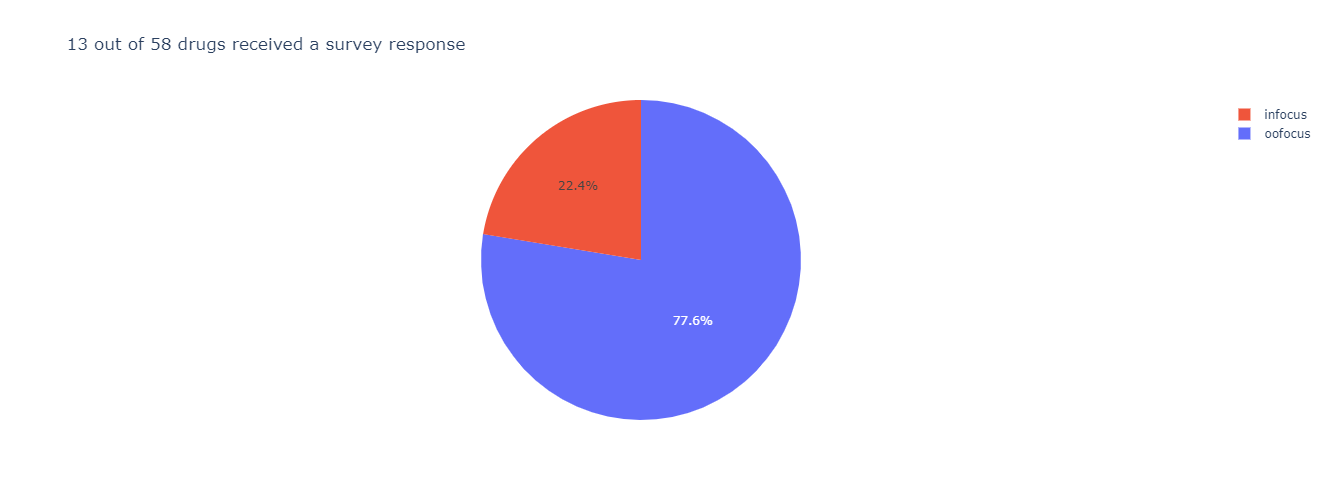

In [9]:
# The marketplace
total_drugs = df_master.Code.unique()
print(f'There are {len(total_drugs)} inhaled-therapy drugs in the marketplace.\n')

# Focus - Addressed v/s unaddressed drugs
unaided = [j for i in df.Unaided.apply(lambda x: [code_drug.get(y, y) for y in x.split(',')]).to_list() for j in i]
aided = [j for i in df.Aided.apply(lambda x: [code_drug.get(y, y) for y in x.split(',')]).to_list() for j in i]

addressed_drugs = set(df.Favourite.to_list()+unaided+aided)

print(f'Out of {len(total_drugs)} drugs, {len(addressed_drugs)} have been addressed by physicians in this paper')

# ...build a series for pie
scope = pd.Series({'infocus': len(addressed_drugs), 'oofocus': len(total_drugs) - len(addressed_drugs)}, name='survey')

focus_pie = px.pie(scope, names=scope.index, values=scope.values, height=500, width=500,
      title=f'{len(addressed_drugs)} out of {len(total_drugs)} drugs received a survey response')

# ... reverse layout to show infocus first!
focus_pie.update_layout(legend={'traceorder':'reversed'})

focus_pie.show()

In [10]:
## Uncomment following code to make an HTML file...
## This makes a pretty huge file of 3 MB for one graph!
# pio.write_html(focus_pie, './web/z_survey_pie.html', auto_open=True)

### Therapy split
* Show split of the therapy by drug-type and combination

In [11]:
s_type = df_master.Type.value_counts() # Type series
s_combi = df_master.SubType.value_counts() # SubType series
s_drugs = df_master.Drug.value_counts() # Drug series

# Create traces
type_pie = px.pie(s_type, values=s_type.values, names=s_type.index, title='Type')
combi_pie = px.pie(s_combi, values=s_combi.values, names=s_combi.index, title='Combination')
drug_pie = px.pie(s_drugs, values=s_drugs.values, names=s_drugs.index, title='Drugs')

#### Split of drug familiarity

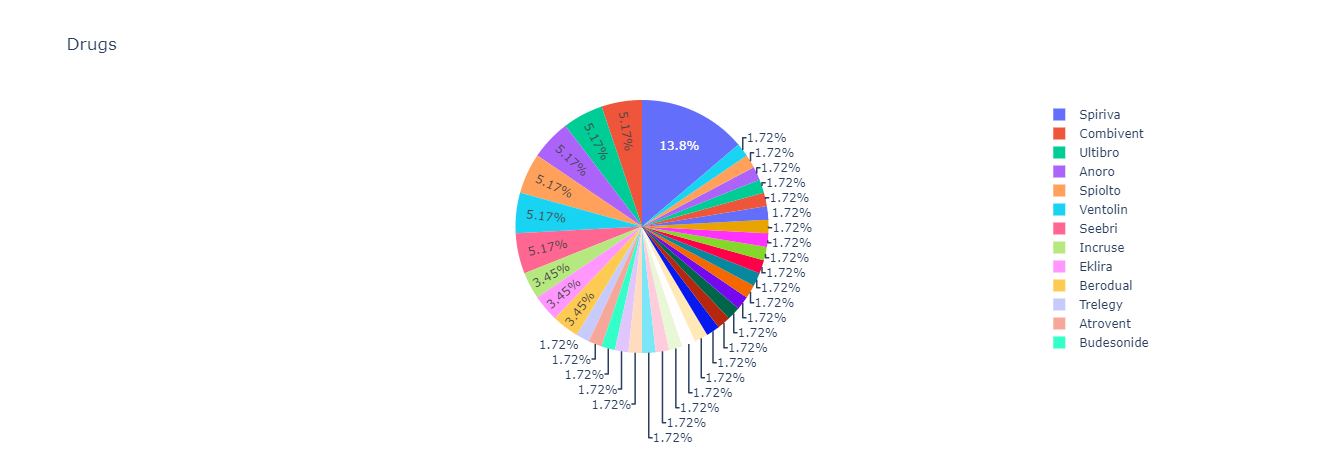

In [12]:
drug_pie.show()

#### Split by drug type

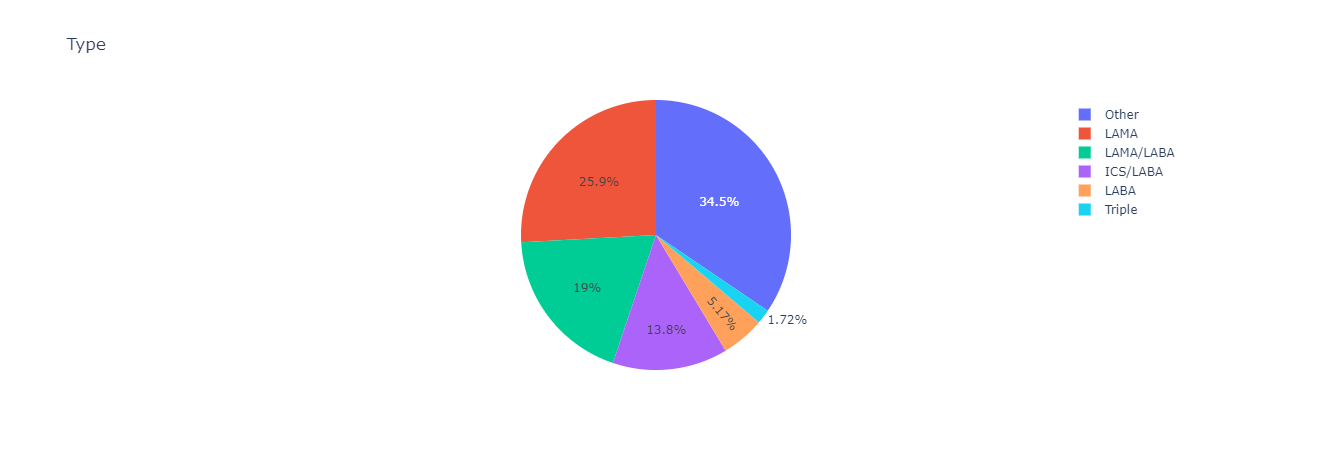

In [13]:
type_pie.show()

#### Split by drug combination

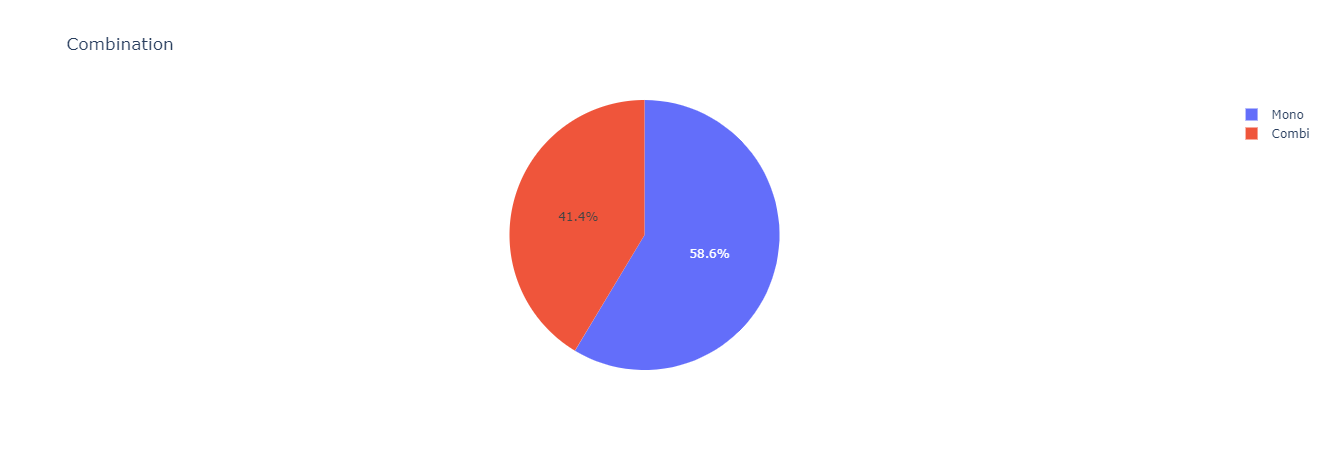

In [14]:
combi_pie.show()

## Drug ratings
Here is the distribution of satsifaction ratings

In [15]:
# ... building the dataframe
df1 = df.iloc[:, 5:].melt(value_name='satisfaction', var_name='drug')
df1['SubType'] = df1.drug.map(df_master.set_index('Drug').SubType.to_dict())

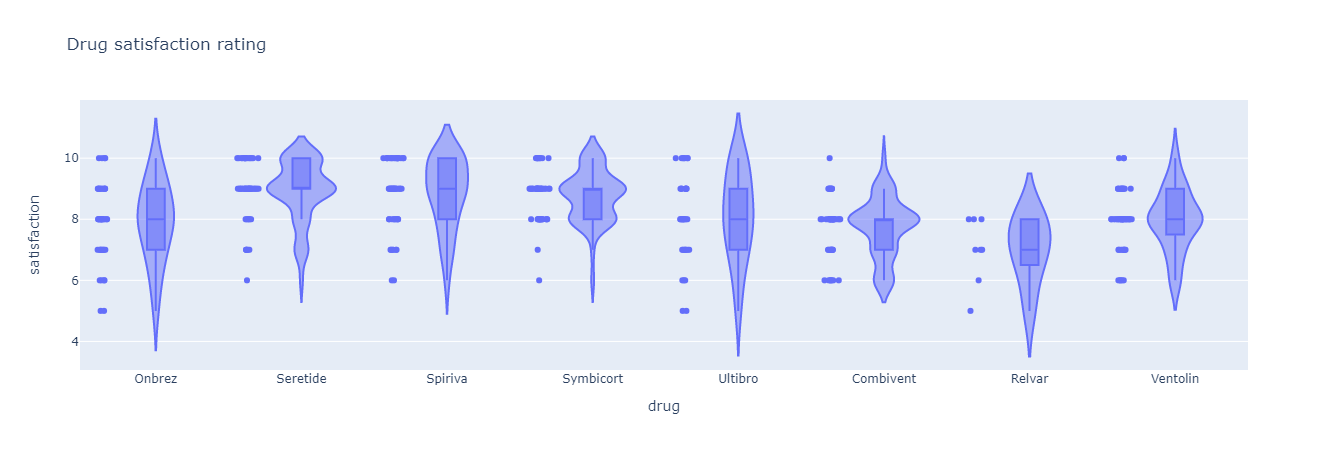

In [16]:
# ... showing the ratings by drug
rating = px.violin(df1, y='satisfaction', x='drug', box=True, points='all', title='Drug satisfaction rating')
rating.show()

From the above it can be seen that there is no clear winner.

#### Distribution of drug satisfaction  by mono and combination

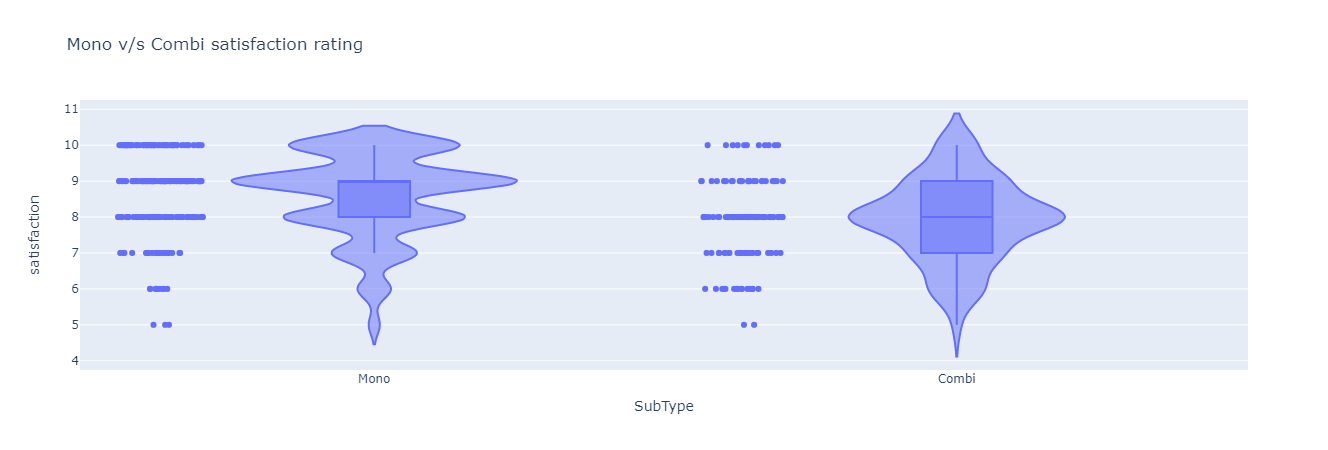

In [17]:
px.violin(df1, y='satisfaction', x='SubType', box=True, points='all', title='Mono v/s Combi satisfaction rating')

# Conclusions
1. 22.4% of drugs were reviewed by the survey
2. Spiriva was the most recognized drug, followed by Spiolto and Anoro
3. LAMA and LAMA/LABA were the most favoured drug type
4. From satisfaction ratings Spiriva was the most preferred. 
    * It also had a normalized satisfaction distribution
3. Combination drugs were found to be more uniformly distributed than Mono drugs, which were all over the place. 